In [87]:
import numpy as np
import pandas as pd

In [88]:
mall = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The dataset contains
1. CustomerId - unique identification number for each customer.
2. Gender - Gender of the Customer
3. Age : Age of the customer
4. Annual Income (k$) : Annual Income of the Customer
5. Spending Score (1-1000) : Score assigned by the mall based on Customer behavior and spending nature

# ___Information about the Dataset___




In [89]:
mall.shape

(200, 5)

In [90]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [91]:
mall.duplicated().sum()

0

In [92]:
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# $info()$
info() is a method used for quickly getting an overview of the DataFrame, including information about

1. The data types,
2. non-null values,
3. memory usage, and
4. The number of columns and rows.

It does not provide statistical information about the data itself, such as mean, min, max, quartiles, etc.

In [93]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# ___$describe()$___
describe() is a method only works on columns with numerical data types useful for gaining insights of various summary statistics such as
1. count,
2. mean,
3. standard deviation,
4. minimum, and maximum values,
5. quartiles.


In [94]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# ___Exploratory Data Analysis (EDA)___

Let's check out some of the stats with some $Data$ $Visualization$ using built-in methods in pandas, seaborn and matplotlib!

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's check the data with respect to gender, and see how other columns are related to it.

In [96]:
mall.groupby('Gender').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,38.098214,12.644095,18.0,29.00,35.0,47.5,68.0
Male,88.0,39.806818,15.514812,18.0,27.75,37.0,50.5,70.0


We can plot the above data like for
1. number of male and female customers by $count$ $plot$ from seaborn.
2. showing the percentage of male and female by $pie$ $chart$ from matplotlib

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

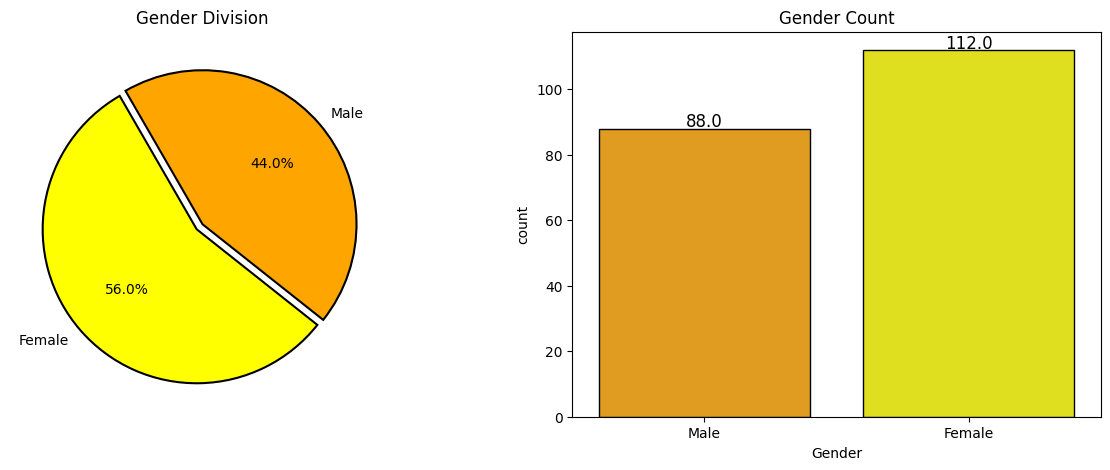

In [97]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

plt.subplot(1,2,1)
gender_counts = mall['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',startangle = 120,explode = (0.05,0),colors=['yellow','orange'],
       wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
plt.title('Gender Division');

plt.subplot(1,2,2)
ax = sns.countplot(mall, x=mall["Gender"],palette=['orange','yellow'],edgecolor='black')
ax.set_facecolor('white')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Gender Count')
ax.set_xticklabels(['Male','Female'])

For representing the remaining data with respect to age of the customers like quartiles and median we used $box$ $plot$ from seaborn

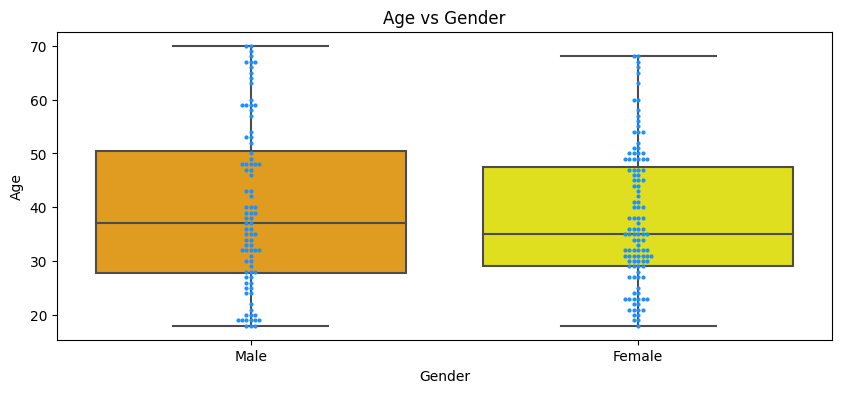

In [98]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4))
ax=sns.boxplot(x=mall['Gender'],y=mall['Age'],palette={'Male':'orange','Female':'yellow'})
sns.swarmplot(x=mall['Gender'],y=mall['Age'], color="dodgerblue", size=3)
plt.title('Age vs Gender')
plt.show()

1. Age range of female customers is from just below $30$ to below $50$ whereas male customers Age ranges from below $30$ to just above $50$.
2. Median Age of male is slightly more than those of female.

In [99]:
mall.groupby('Gender').describe()['Annual Income (k$)']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Male,88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0


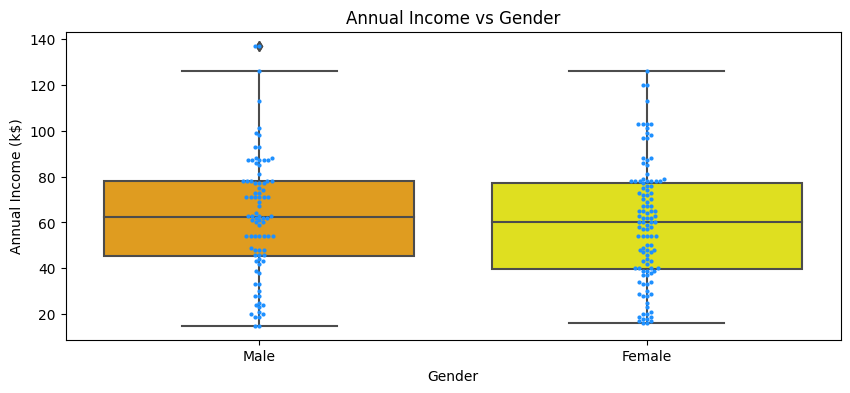

In [100]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4))
ax=sns.boxplot(x=mall['Gender'],y=mall['Annual Income (k$)'],palette={'Male':'orange','Female':'yellow'})
sns.swarmplot(x=mall['Gender'],y=mall['Annual Income (k$)'], color="dodgerblue", size=3)
plt.title('Annual Income vs Gender')
plt.show()

1. For Annual Income, female customer's income starts from $40k$ whereas male customer's is above this value.
2. Median Annual Income for female customer's is near about $60k$ and for male customer's is just above it.

In [101]:
mall.groupby('Gender').describe()['Spending Score (1-100)']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


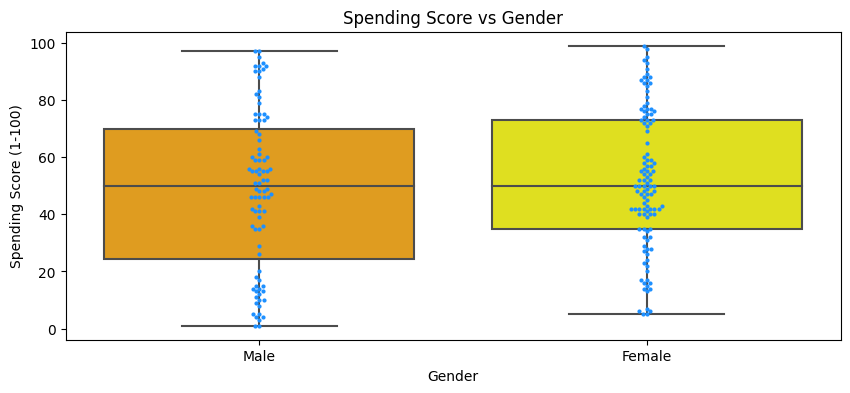

In [102]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4))
ax=sns.boxplot(x=mall['Gender'],y=mall['Spending Score (1-100)'],palette={'Male':'orange','Female':'yellow'})
sns.swarmplot(x=mall['Gender'],y=mall['Spending Score (1-100)'], color="dodgerblue", size=3)
plt.title('Spending Score vs Gender')
plt.show()

:To check how the data columns are distributed, we used histplots.

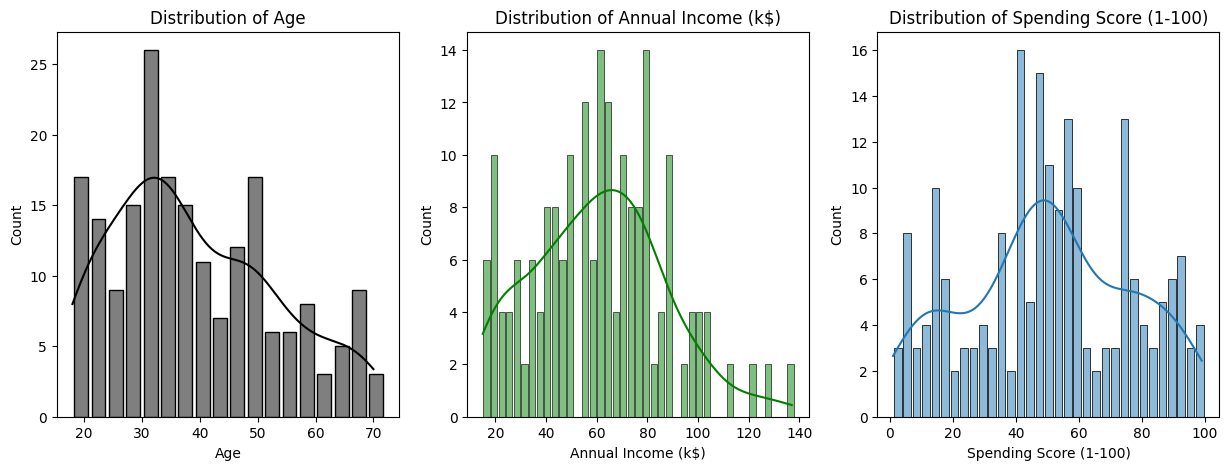

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(mall, x='Age', binwidth=3, shrink=0.8, kde=True, color="black", ax=axes[0])
axes[0].set_title('Distribution of Age')

sns.histplot(mall, x='Annual Income (k$)', binwidth=3, shrink=0.8, kde=True, color="green", ax=axes[1])
axes[1].set_title('Distribution of Annual Income (k$)')

sns.histplot(mall, x='Spending Score (1-100)', binwidth=3, shrink=0.8, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Spending Score (1-100)')

plt.show()


1. Distribution of Age and Annual Income (k$) is positively or righly skewed.
2. Spending Score data distribution is kind of negatively or left skewed and also similar to the Head and Shoulder pattern observed in stock charts.
3. It displays Score rising to a peak and then declines back to the base of the prior up-move.
4. Something similar can be observed with the 2 shoulders forming around the values 20 & 80 with head being centered in between 40 - 60.

# __Modelling :__

We can see that this problem is an $Unsupervised$ Machine Learning Problem.

Unsupervised Learning : It is a problem where the target variable / feature is unknown.

We use K-Means Clustering algorithm which does not support categorical features
It is the most preferred algorithm for dealing with Unsupervised Learning that does the job of finding clusters / groups in data but with a mathematical approach.

$Approach:$

1. Selects k (assume k = 2) centroids randomly.
2. Distance between the centroids and all the data points are calculated.
3. If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
4. For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
5. This process repeats itself untill both centroids converge to fixed points.

Here the main parameter ($hyperparameter$) is $k$ (number of clusters).

$k$ - $Hyperparameter:$

It defines the number of clusters or groups the data is to be divided into.

For the selection of values of k, we use $elbow$ method or $silhouette$ method:

As we have mentioned K-means clustering algorithm does not work on categorical data, we remove Gender from original data.

In [104]:
mall.drop(columns = ['Gender'],inplace = True)

$Elbow$ $Method:$
1. It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k the value that resembles an elbow is selected.
2. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.

$Silhouette$ $Score$ $Method:$

1. It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other.
2. This score is calculated using the euclidean distance formula and the k value with highest score is selected for modeling.

In [105]:
income_score = mall[['Annual Income (k$)', 'Spending Score (1-100)']].values
income_age = mall[['Annual Income (k$)','Age']].values
score_age = mall[['Spending Score (1-100)','Age']].values

For $Elbow$ $Method$ we will calculate Within Cluster Sum of Squares values ($WCSS$) for different values of k.

For $Silhouette$ $Score$ $Method$ we will calculate euclidean distance of point from points within cluster and nearest cluster for different values of k.

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
wcss_is = []
sil_score_is =[]
wcss_ia = []
sil_score_ia =[]
wcss_sa = []
sil_score_sa =[]
k_max = 10
for i in range(1,k_max+1):
  ###
  kmeans_is = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans_is.fit(income_score)
  label_is =kmeans_is.labels_
  if i>1:
    sil_score_is.append(silhouette_score(income_score, label_is, metric = 'euclidean'))
  wcss_is.append(kmeans_is.inertia_)
  #####
  kmeans_ia = KMeans(n_clusters = i,init = 'k-means++',random_state = 40)
  kmeans_ia.fit(income_age)
  label_ia =kmeans_ia.labels_
  if i>1:
    sil_score_ia.append(silhouette_score(income_age, label_ia, metric = 'euclidean'))
  wcss_ia.append(kmeans_ia.inertia_)
  ######
  kmeans_sa = KMeans(n_clusters = i,init = 'k-means++',random_state = 48)
  kmeans_sa.fit(score_age)
  label_sa =kmeans_sa.labels_
  if i>1:
    sil_score_sa.append(silhouette_score(score_age, label_sa, metric = 'euclidean'))
  wcss_sa.append(kmeans_sa.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [108]:
print("      {:<25}|{:<25}|{:<25}".format("Income_Score", "Income_Age", "Score_Age"))
print("-"*76)
print("{:<5}|{:<12}|{:<12}|{:<12}|{:<12}|{:<12}|{:<12}".format("K","WCSS","Sil","WCSS","Sil","WCSS","Sil"))
print("-"*76)
for i in range(2,k_max-1):
  print("{:<5}|{:<12.3f}|{:<12.3f}|{:<12.3f}|{:<12.3f}|{:<12.3f}|{:<12.3f}".format(i+2,wcss_is[i],sil_score_is[i],wcss_ia[i],sil_score_ia[i],wcss_sa[i],sil_score_sa[i]))



      Income_Score             |Income_Age               |Score_Age                
----------------------------------------------------------------------------
K    |WCSS        |Sil         |WCSS        |Sil         |WCSS        |Sil         
----------------------------------------------------------------------------
4    |106348.373  |0.493       |59486.961   |0.434       |45840.677   |0.500       
5    |73679.789   |0.554       |39502.779   |0.402       |28165.584   |0.431       
6    |44448.455   |0.540       |31659.353   |0.396       |23829.932   |0.448       
7    |37233.815   |0.526       |25399.022   |0.386       |19566.522   |0.421       
8    |30259.657   |0.458       |21768.689   |0.385       |15690.721   |0.431       
9    |25011.839   |0.455       |19041.077   |0.393       |13027.465   |0.411       
10   |21862.093   |0.459       |16017.452   |0.408       |11524.867   |0.413       


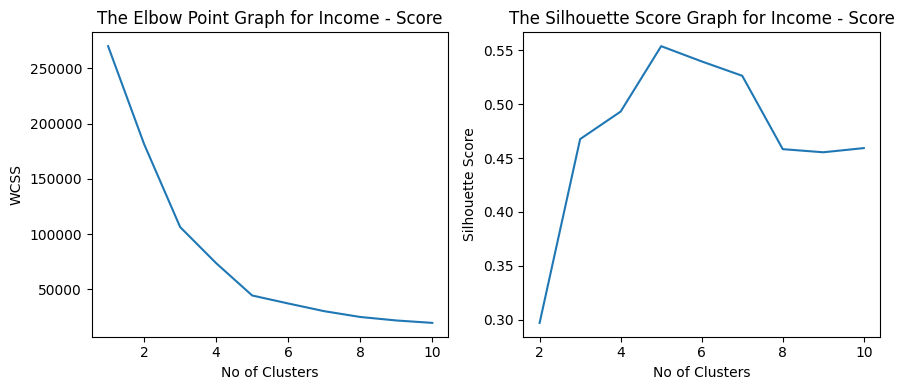

In [109]:
fig,ax = fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(range(1, k_max+1), wcss_is)
ax[0].set_title('The Elbow Point Graph for Income - Score')
ax[0].set_xlabel('No of Clusters')
ax[0].set_ylabel('WCSS')
ax[1].plot(range(2, k_max+1), sil_score_is)
ax[1].set_title('The Silhouette Score Graph for Income - Score')
ax[1].set_xlabel('No of Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

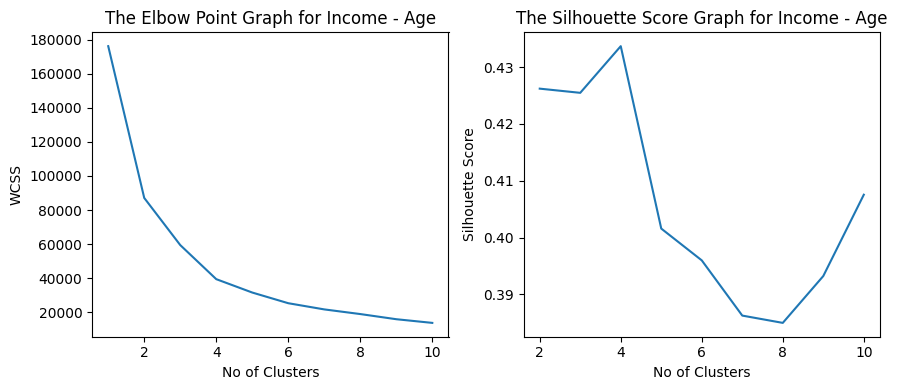

In [110]:
fig,ax = fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(range(1, k_max+1), wcss_ia)
ax[0].set_title('The Elbow Point Graph for Income - Age')
ax[0].set_xlabel('No of Clusters')
ax[0].set_ylabel('WCSS')
ax[1].plot(range(2, k_max+1), sil_score_ia)
ax[1].set_title('The Silhouette Score Graph for Income - Age')
ax[1].set_xlabel('No of Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

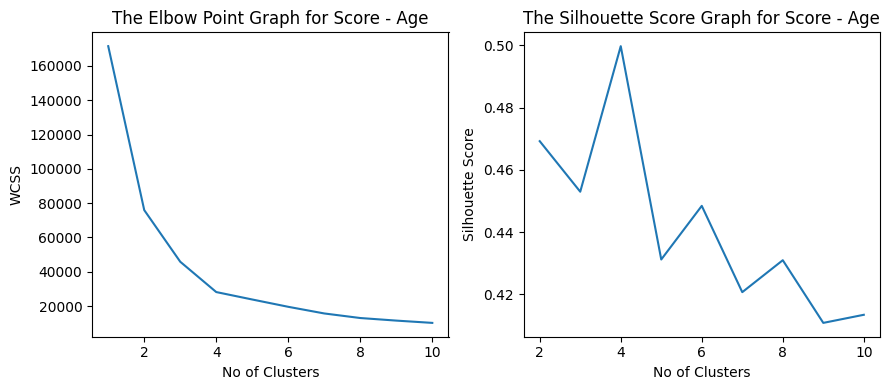

In [111]:
fig,ax = fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(range(1, k_max+1), wcss_sa)
ax[0].set_title('The Elbow Point Graph for Score - Age')
ax[0].set_xlabel('No of Clusters')
ax[0].set_ylabel('WCSS')
ax[1].plot(range(2, k_max+1), sil_score_sa)
ax[1].set_title('The Silhouette Score Graph for Score - Age')
ax[1].set_xlabel('No of Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [112]:
k_sa = sil_score_sa.index(max(sil_score_sa))+2
k_is = sil_score_is.index(max(sil_score_is))+2
k_ia = sil_score_ia.index(max(sil_score_ia))+2

In [113]:
print(f'{k_sa},{k_is},{k_ia}')

4,5,4


In [114]:
kmeans_model_is = KMeans(n_clusters = k_is,max_iter=1000)
Y_is = kmeans_model_is.fit_predict(income_score)
######
kmeans_model_ia = KMeans(n_clusters = k_ia,max_iter=1000)
Y_ia = kmeans_model_ia.fit_predict(income_age)
########
kmeans_model_sa = KMeans(n_clusters = k_sa,max_iter=1000)
Y_sa = kmeans_model_sa.fit_predict(score_age)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


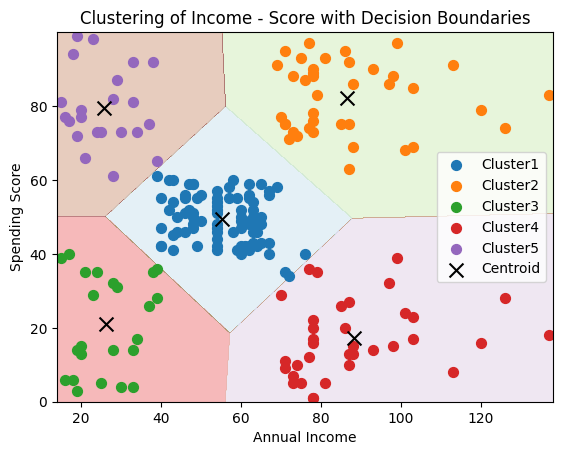

In [115]:
h = 0.01  # step size of the meshgrid
x_min, x_max = income_score[:, 0].min() - 1, income_score[:, 0].max() + 1
y_min, y_max = income_score[:, 1].min() - 1, income_score[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions for each point in the meshgrid
mesh_predictions = kmeans_model_is.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Paired, alpha=0.3)

# Plot data points for each cluster
for i in range(k_is):
  label='Cluster'+str(i+1)
  plt.scatter(income_score[Y_is==i,0], income_score[Y_is==i,1], s=50,label=label)

# Plot centroids
plt.scatter(kmeans_model_is.cluster_centers_[:,0], kmeans_model_is.cluster_centers_[:,1], marker='x', s=100, c='black', label='Centroid')

plt.title('Clustering of Income - Score with Decision Boundaries')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

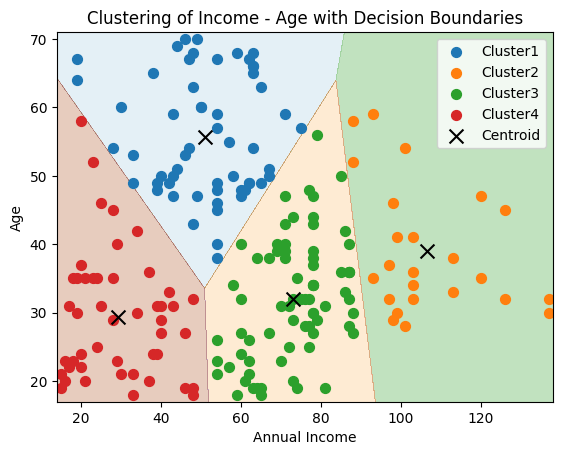

In [116]:
h = 0.01  # step size of the meshgrid
x_min, x_max = income_age[:, 0].min() - 1, income_age[:, 0].max() + 1
y_min, y_max = income_age[:, 1].min() - 1, income_age[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions for each point in the meshgrid
mesh_predictions = kmeans_model_ia.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Paired, alpha=0.3)

# Plot data points for each cluster
for i in range(k_ia):
  label = 'Cluster'+str(i+1)
  plt.scatter(income_age[Y_ia==i,0], income_age[Y_ia==i,1], s=50,label=label)

# Plot centroids
plt.scatter(kmeans_model_ia.cluster_centers_[:,0], kmeans_model_ia.cluster_centers_[:,1], marker='x', s=100, c='black', label='Centroid')

plt.title('Clustering of Income - Age with Decision Boundaries')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend()
plt.show()

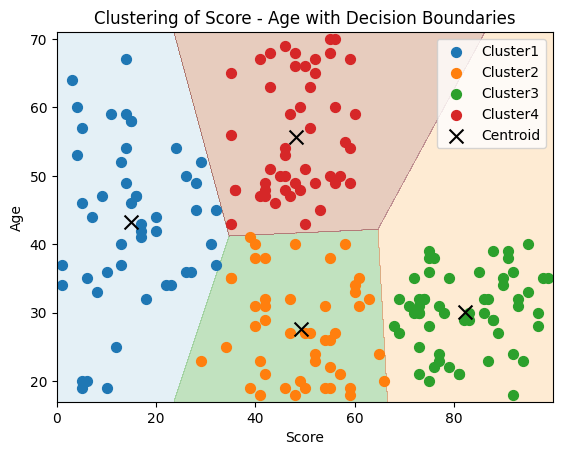

In [117]:
h = 0.01  # step size of the meshgrid
x_min, x_max = score_age[:, 0].min() - 1, score_age[:, 0].max() + 1
y_min, y_max = score_age[:, 1].min() - 1, score_age[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions for each point in the meshgrid
mesh_predictions = kmeans_model_sa.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Paired, alpha=0.3)

# Plot data points for each cluster
for i in range(k_sa):
  label = 'Cluster'+str(i+1)
  plt.scatter(score_age[Y_sa==i,0], score_age[Y_sa==i,1], s=50,label=label)

# Plot centroids
plt.scatter(kmeans_model_sa.cluster_centers_[:,0], kmeans_model_sa.cluster_centers_[:,1], marker='x', s=100, c='black', label='Centroid')

plt.title('Clustering of Score - Age with Decision Boundaries')
plt.xlabel('Score')
plt.ylabel('Age')
plt.legend()
plt.show()

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [119]:
X = mall.copy()

In [120]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X[['Annual Income (k$)','Age','Spending Score (1-100)']])

In [121]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [122]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([mall, pca_df], axis=1)

In [123]:
pca_df = pca_df[['PC1','PC2']]

In [124]:
wcss = []
sil_score =[]
k_max = 10
for i in range(1,k_max+1):
  ###
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
  kmeans.fit(pca_df)
  label =kmeans.labels_
  if i>1:
    sil_score.append(silhouette_score(pca_df, label, metric = 'euclidean'))
  wcss.append(kmeans.inertia_)
  #####

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [125]:
k = sil_score.index(max(sil_score))+2

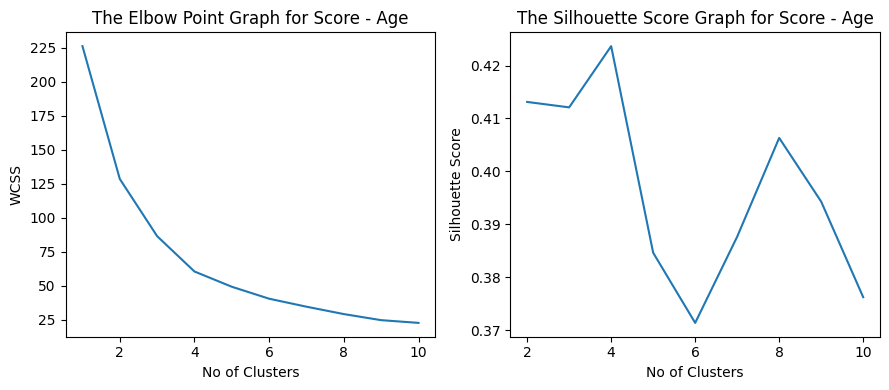

In [126]:
fig,ax = fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(range(1, k_max+1), wcss)
ax[0].set_title('The Elbow Point Graph for Score - Age')
ax[0].set_xlabel('No of Clusters')
ax[0].set_ylabel('WCSS')
ax[1].plot(range(2, k_max+1), sil_score)
ax[1].set_title('The Silhouette Score Graph for Score - Age')
ax[1].set_xlabel('No of Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [127]:
kmeans_model = KMeans(n_clusters = k,max_iter=1000)
Y = kmeans_model.fit_predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


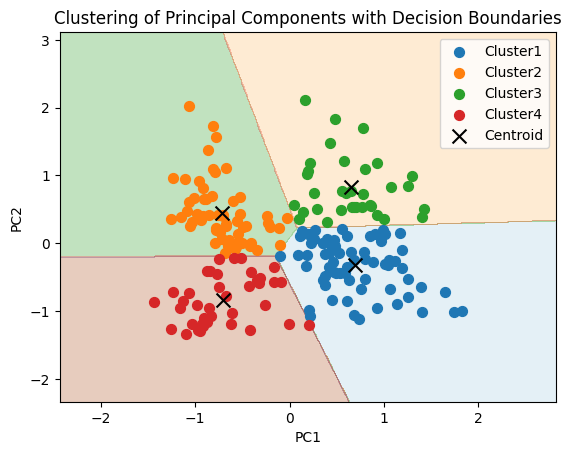

In [128]:
h = 0.01  # step size of the meshgrid
x_min, x_max = pca_df.iloc[:, 0].min() - 1, pca_df.iloc[:, 0].max() + 1
y_min, y_max = pca_df.iloc[:, 1].min() - 1, pca_df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions for each point in the meshgrid
mesh_predictions = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.Paired, alpha=0.3)

# Plot data points for each cluster
for i in range(k):
  label='Cluster'+str(i+1)
  plt.scatter(pca_df.iloc[Y==i,0], pca_df.iloc[Y==i,1], s=50,label=label)

# Plot centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], marker='x', s=100, c='black', label='Centroid')

plt.title('Clustering of Principal Components with Decision Boundaries')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()